<a href="https://colab.research.google.com/github/franrilo/Test-Notebooks/blob/main/Testing_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pycaret


     |████████████████████████████████| 266kB 5.0MB/s 
     |████████████████████████████████| 174kB 17.3MB/s 
     |████████████████████████████████| 1.4MB 19.8MB/s 
     |████████████████████████████████| 6.8MB 33.2MB/s 
     |████████████████████████████████| 14.2MB 264kB/s 
     |████████████████████████████████| 245kB 52.4MB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 1.7MB 45.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 112kB 46.5MB/s 
     |████████████████████████████████| 2.0MB 43.4MB/s 
     |████████████████████████████████| 276kB 48.8MB/s 
     |████████████████████████████████| 1.1MB 33.3MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 


In [5]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [12]:
import numpy as np
from tensorflow import keras
from pycaret.datasets import get_data
from pycaret.classification import *

dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [13]:
train_data = dataset.sample(frac=0.95, random_state=786)
test_data = dataset.drop(train_data.index)
train_data.reset_index(drop=True)
test_data.reset_index(drop=True)

print ("Train shape" + str(train_data.shape) + "\n" + "Test shape:" + str(test_data.shape))

Train shape(22800, 24)
Test shape:(1200, 24)


In [14]:
setup_data = setup(data=train_data, target='default',session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.052
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.306
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.3551,0.6806,0.4664,0.3725,0.4010,5.677
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,1.330
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.3609,0.6679,0.4683,0.3721,0.3977,0.453
rf,Random Forest Classifier,0.8199,0.7598,0.3663,0.6601,0.4707,0.3727,0.3965,3.105
et,Extra Trees Classifier,0.8092,0.7377,0.3677,0.6047,0.4571,0.3497,0.3657,2.444
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,1.063
knn,K Neighbors Classifier,0.7547,0.5939,0.1763,0.3719,0.2388,0.1145,0.1259,0.998
dt,Decision Tree Classifier,0.7293,0.6147,0.4104,0.3878,0.3986,0.2242,0.2245,0.386


In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [17]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8108,0.7865,0.3238,0.6313,0.4280,0.3285,0.3548
1,0.8302,0.7829,0.3926,0.6990,0.5028,0.4099,0.4348
2,0.8189,0.7823,0.3238,0.6807,0.4388,0.3467,0.3809
3,0.8258,0.7869,0.3553,0.7006,0.4715,0.3803,0.4117
4,0.8195,0.7954,0.3496,0.6667,0.4586,0.3628,0.3900
5,0.8346,0.7981,0.3983,0.7202,0.5129,0.4231,0.4500
6,0.8189,0.7760,0.3553,0.6596,0.4618,0.3645,0.3898
7,0.8239,0.7591,0.3410,0.7000,0.4586,0.3680,0.4021
8,0.8170,0.7563,0.3438,0.6557,0.4511,0.3539,0.3805
9,0.8263,0.7658,0.3678,0.6919,0.4803,0.3875,0.4155


In [19]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [21]:
lr = create_model ('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7813,0.6275,0.0000,0.0,0.0000,0.0000,0.0000
1,0.7813,0.6383,0.0000,0.0,0.0000,0.0000,0.0000
2,0.7813,0.6203,0.0000,0.0,0.0000,0.0000,0.0000
3,0.7813,0.6503,0.0000,0.0,0.0000,0.0000,0.0000
4,0.7813,0.6740,0.0000,0.0,0.0000,0.0000,0.0000
5,0.7807,0.6486,0.0000,0.0,0.0000,-0.0013,-0.0132
6,0.7813,0.6383,0.0000,0.0,0.0000,0.0000,0.0000
7,0.7813,0.6616,0.0000,0.0,0.0000,0.0000,0.0000
8,0.7813,0.6281,0.0000,0.0,0.0000,0.0000,0.0000
9,0.7824,0.6233,0.0029,1.0,0.0057,0.0045,0.0474


In [22]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


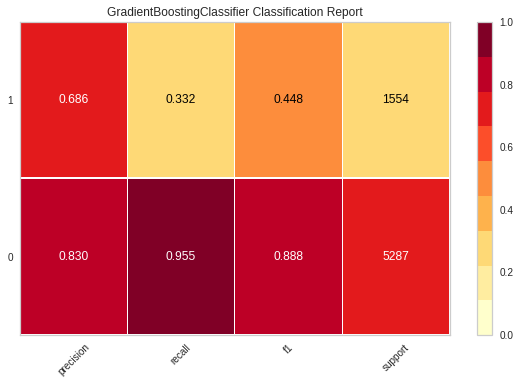

In [37]:
plot_model(gbc, plot='confusion_matrix')
plot_model(gbc, plot='error')
plot_model(gbc, plot='class_report')

In [30]:
help(plot_model)

Help on function plot_model in module pycaret.classification:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, use_train_data: bool = False, verbose: bool = True, display_format: Union[str, NoneType] = None) -> str
    This function analyzes the performance of a trained model on holdout set. 
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'auc' - Area Under the

In [38]:
predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8138,0.7782,0.332,0.6862,0.4475,0.3514,0.385


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_-2,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_-2,PAY_2_0,...,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,80000.0,29.0,6228.0,589.0,390.0,390.0,390.0,383.0,589.0,390.0,390.0,390.0,383.0,2390.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8360
1,180000.0,30.0,149069.0,152317.0,156282.0,161163.0,172190.0,148963.0,7500.0,8000.0,9000.0,14000.0,0.0,5500.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.8854
2,100000.0,26.0,18999.0,23699.0,9390.0,5781.0,8065.0,17277.0,5129.0,1227.0,1000.0,5914.0,10000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9048
3,500000.0,36.0,396.0,1043.0,19230.0,116696.0,194483.0,195454.0,1043.0,19230.0,100062.0,94503.0,10000.0,40000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9176
4,190000.0,47.0,192493.0,193297.0,193400.0,193278.0,192956.0,193039.0,7200.0,7222.0,7300.0,7100.0,7380.0,7200.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,120000.0,44.0,75294.0,76465.0,74675.0,79629.0,77748.0,82497.0,3000.0,0.0,6200.0,0.0,6000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5807
6837,50000.0,26.0,47095.0,48085.0,49039.0,49662.0,0.0,0.0,2073.0,2027.0,1650.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8537
6838,80000.0,39.0,46401.0,39456.0,30712.0,29629.0,28241.0,28030.0,1560.0,1421.0,1001.0,1000.0,1008.0,964.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8574
6839,2000

In [41]:
predictions= predict_model(gbc,data=test_data)
predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
5,100000,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8574
39,380000,1,2,2,32,-1,-1,-1,-1,-1,-1,22401.0,21540.0,15134.0,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9601
57,200000,2,2,1,32,-1,-1,-1,-1,2,-1,9076.0,5787.0,-684.0,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8728
72,200000,1,1,1,53,2,2,2,2,2,2,138180.0,140774.0,142460.0,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.6733
103,240000,1,1,2,41,1,-1,-1,0,0,-1,95.0,2622.0,3301.0,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.7530


In [42]:
from pycaret.utils import check_metric
check_metric(predictions['default'], predictions['Label'], metric='Accuracy')

0.8158